In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
movies = pd.read_csv("movies_metadata.csv", low_memory=False)  
ratings_small = pd.read_csv("ratings_small.csv")
credits = pd.read_csv("credits.csv")
keywords = pd.read_csv("keywords.csv")
links = pd.read_csv("links.csv")
links_small = pd.read_csv("links_small.csv")
ratings = pd.read_csv("ratings.csv")
#print(movies.columns)


### Zusammenhang zwischen Produktionsbudget und durchschnittlicher Bewertung von Filmen

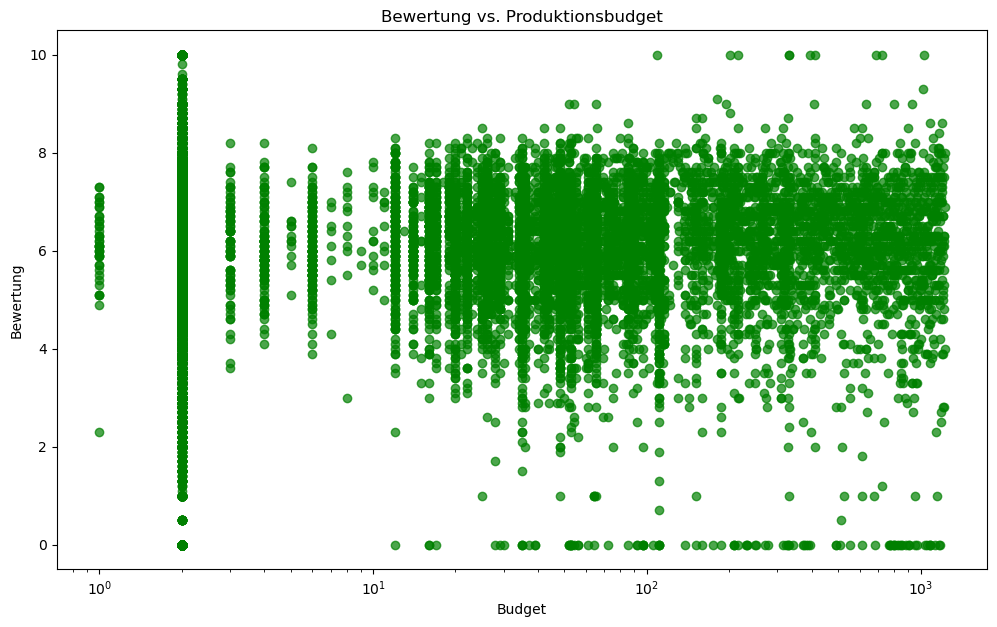

In [63]:
plt.figure(figsize=(12,7))
plt.scatter(movies['budget'], movies['vote_average'], alpha=0.7, color='green')
plt.title('Bewertung vs. Produktionsbudget')
plt.xlabel('Budget')
plt.ylabel('Bewertung')
plt.xscale('log')  # Logarithmische Skalierung für bessere Darstellung
plt.yscale('linear')
plt.show()

### Entwicklung der durchschnittlichen Filmbewertungen über die Jahre

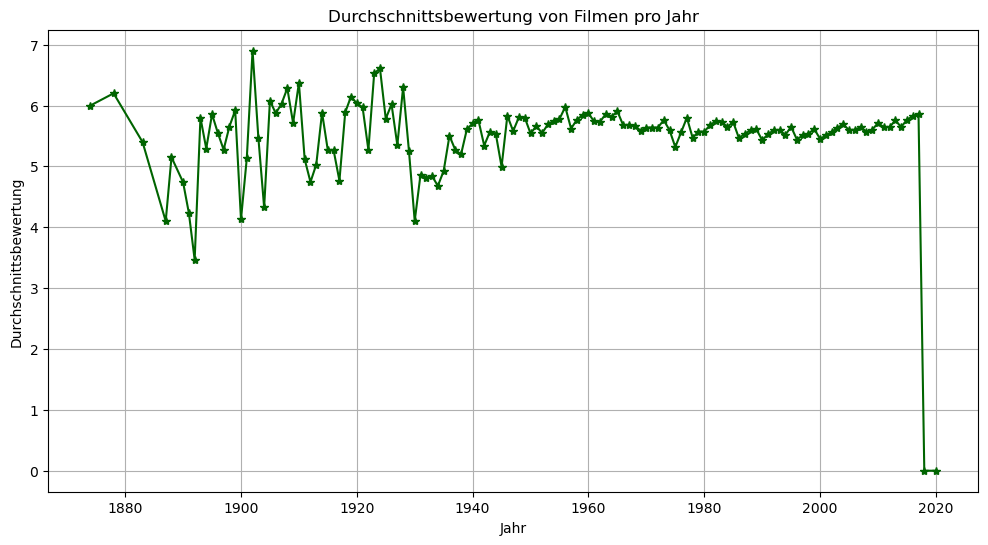

In [64]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year
avg_rating_per_year = movies.groupby('year')['vote_average'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(12, 6))
avg_rating_per_year.plot(kind='line', color='darkgreen', marker='*')
plt.title('Durchschnittsbewertung von Filmen pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittsbewertung')
plt.grid(True)
plt.show()

### Die 10 am höchsten bewerteten Filme basierend auf der durchschnittlichen Bewertung

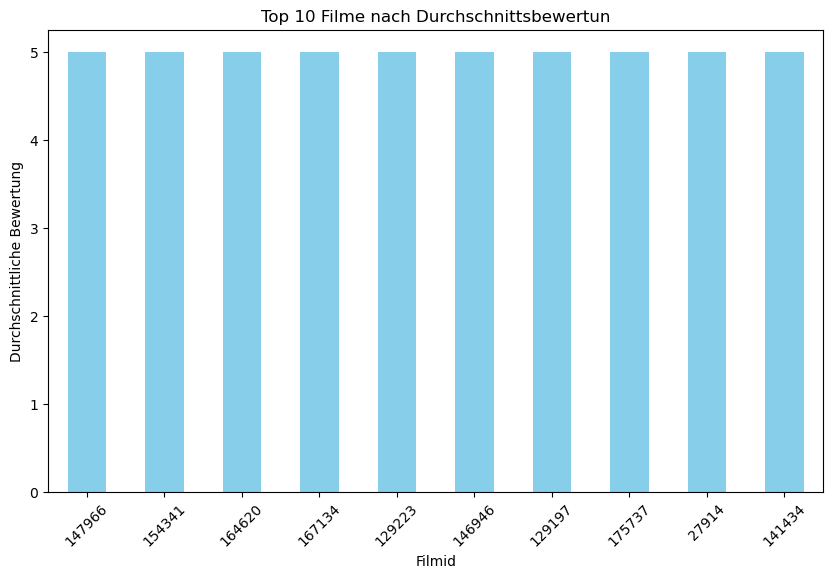

In [86]:
# Gruppiere die Filme nach ihrer durchschnittlichen Bewertung und plotiere sie
avg_ratings = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False)
top_avg_ratings = avg_ratings.head(10)  # Die 10 höchsten bewerteten Filme holen

# Balkendiagramm erstellen
plt.figure(figsize=(10,6))
top_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Filme nach Durchschnittsbewertun')
plt.xlabel('Filmid')
plt.ylabel('Durchschnittliche Bewertung')
plt.xticks(rotation=45)
plt.show()


## Line Chart
#### Entwicklung der durchschnittlichen Film-Bewertungen im Zeitverlauf

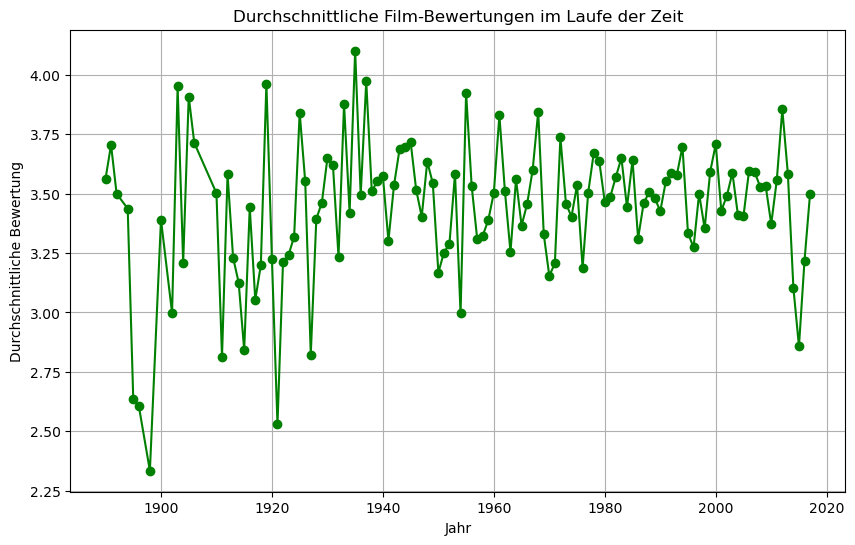

In [84]:
# Überprüfen auf nicht-numerische Werte in der 'id'-Spalte
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')  # Ungültige Werte werden in NaN umgewandelt

# Zeilen mit NaN-Werten in der 'id'-Spalte entfernen
movies = movies.dropna(subset=['id'])
movies['id'] = movies['id'].astype(int)
# Nun den Merge durchführen
movies_ratings = pd.merge(movies[['id', 'release_date']], ratings[['movieId', 'rating']], left_on='id', right_on='movieId')
movies_ratings['release_year'] = pd.to_datetime(movies_ratings['release_date']).dt.year
avg_ratings_yearly = movies_ratings.groupby('release_year')['rating'].mean()
# Liniendiagramm erstellen
plt.figure(figsize=(10,6))
avg_ratings_yearly.plot(kind='line', color='green', marker='o')
plt.title('Durchschnittliche Film-Bewertungen im Laufe der Zeit')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittliche Bewertung')
plt.grid(True)
plt.show()


# Scatter Plot: 
### To visualize the relationship between budget (if available) and the ratings for movies.

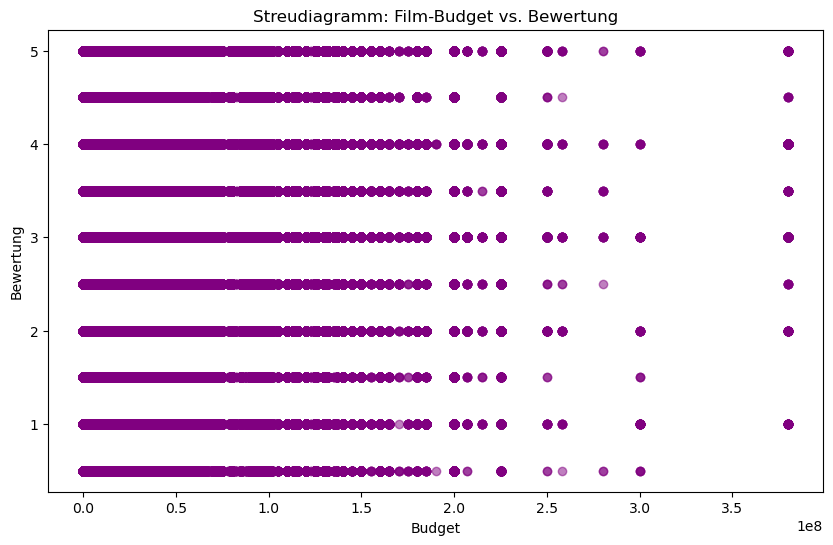

In [67]:
# Angenommen, wir haben Budget- und Bewertungsinformationen im 'movies'-Datensatz
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')  # Budget in numerisch umwandeln
movies_ratings = pd.merge(movies[['id', 'budget']], ratings[['movieId', 'rating']], left_on='id', right_on='movieId')
# Streudiagramm erstellen
plt.figure(figsize=(10,6))
plt.scatter(movies_ratings['budget'], movies_ratings['rating'], alpha=0.5, color='purple')
plt.title('Streudiagramm: Film-Budget vs. Bewertung')
plt.xlabel('Budget')
plt.ylabel('Bewertung')
plt.show()
